In [1]:
# Import necessary packages
import pandas as pd
import numpy as np

# !pip install nolds
# !pip install MFDFA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import nolds
from MFDFA import MFDFA

In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\\aro13\\Downloads\\")


In [4]:
#import data
import os
os.getcwd()
os.chdir("C:\\Users\\aro13\\Downloads\\")


def closePrice(filename):
    data = pd.read_csv(filename, sep = ",", header = 1)
    data = data[['date', 'close']].set_index(['date'])
    return data[:1421][::-1]

bitcoin = closePrice("Binance_BTCUSDT_d.csv")
ethereum = closePrice("Binance_ETHUSDT_d.csv")
binance = closePrice("Binance_BNBUSDT_d.csv")
cardano = closePrice("Binance_ADAUSDT_d (2).csv")
solana = closePrice("Binance_SOLUSDT_d.csv")
ripple = closePrice("Binance_XRPUSDT_d.csv")
print(ripple[:5])


                       close
date                        
2018-05-04 00:00:00  0.88990
2018-05-05 00:00:00  0.90280
2018-05-06 00:00:00  0.86483
2018-05-07 00:00:00  0.82490
2018-05-08 00:00:00  0.80667


In [5]:
# Define coin names for functions later on
coins = [bitcoin, ethereum, binance, cardano, solana, ripple]
coin_name = ['Bitcoin', 'Ethereum', "Binance coin", "Cardano", "Solana", "Ripple"]
coin_abr = ["BTC", "ETH", "BNB", "ADA", "SOL", "XRP"]

In [6]:
#inpsecting data

# missing values 

def missingValues():
    for token, name in zip(coins, coin_name):
        missing = token.isnull()
        if np.all(missing) == False:
            print("The " + name + " time series has no missing values")

missingValues()


The Bitcoin time series has no missing values
The Ethereum time series has no missing values
The Binance coin time series has no missing values
The Cardano time series has no missing values
The Solana time series has no missing values
The Ripple time series has no missing values


In [11]:
for i,coin in enumerate(coins):
    print(coin_name[i], np.min(coin), np.max(coin), np.mean(coin), np.std(coin))

Bitcoin close    3211.72
dtype: float64 close    67525.83
dtype: float64 close    17275.071316
dtype: float64 close    16934.027225
dtype: float64
Ethereum close    83.76
dtype: float64 close    4807.98
dtype: float64 close    834.87841
dtype: float64 close    1067.127308
dtype: float64
Binance coin close    4.516
dtype: float64 close    676.15
dtype: float64 close    92.849433
dtype: float64 close    160.120686
dtype: float64
Cardano close    0.02329
dtype: float64 close    2.966
dtype: float64 close    0.432209
dtype: float64 close    0.690794
dtype: float64
Solana close    1.1975
dtype: float64 close    258.44
dtype: float64 close    48.502678
dtype: float64 close    65.074194
dtype: float64
Ripple close    0.13549
dtype: float64 close    1.83468
dtype: float64 close    0.465436
dtype: float64 close    0.317993
dtype: float64


In [12]:
# plot the time series

# plot of the time series
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.plot(bitcoin), plt.title("BTC Dec. 2017 to Nov. 2022")
plt.subplot(2, 2, 2), plt.plot(ethereum), plt.title("ETH Dec. 2017 to Nov. 2022")
plt.subplot(2, 2, 3), plt.plot(binance), plt.title("BNB Dec. 2017 to Nov. 2022")
plt.subplot(2, 2, 4), plt.plot(cardano), plt.title("ADA Dec. 2017 to Nov. 2022")


(<AxesSubplot:title={'center':'ADA Dec. 2017 to Nov. 2022'}>,
 Text(0.5, 1.0, 'ADA Dec. 2017 to Nov. 2022'))

Error in callback <function flush_figures at 0x000001E029795280> (for post_execute):


KeyboardInterrupt: 

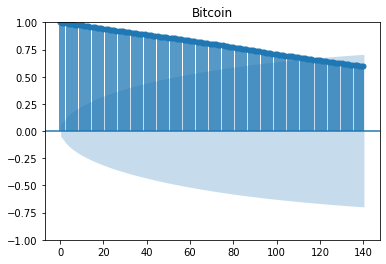

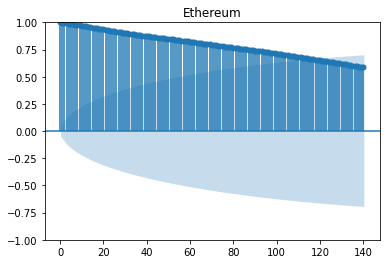

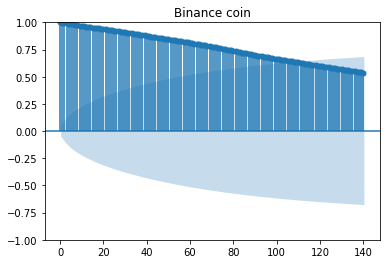

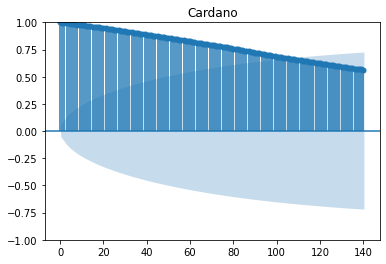

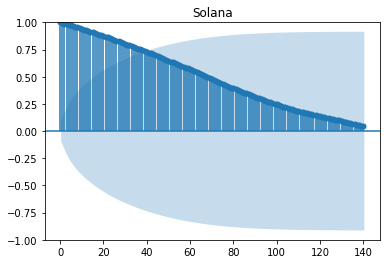

In [ ]:
# Autocorrelation plots - BITCOIN, ETHEREUM, BINANCE COIN

def autoCorrelation():
    nlag = 120
    for i, token in enumerate(coins):
        plot_acf(np.log(token), lags = 140, title = coin_name[i], fft = False) # autocorrelation reaches 0 around lag=100
autoCorrelation()


In [ ]:
def computeLLE(data):
    dimensions = [4,6,8,10]
    nlags = [80,90,100,110] # based to autocorrelation functions
    theilers = [80,90,100,110]
    delay = [2,4,6,8]
    exponents = []
    for i in range(len(nlags)):
        value = nolds.lyap_r(data['close'], emb_dim = dimensions[i], lag = nlags[i], tau = delay[i], min_tsep=theilers[i])
        exponents.append(value)

    return exponents

In [ ]:
for token, name in zip(coins, coin_name):
    if name == "Solana":
        continue
    print(name, "has exponents of", computeLLE(token), "for different values of parameters")

Bitcoin has exponents of [0.012187344567817346, 0.0019442579325506992, 0.001333493238304042, 0.0020299000847608826] for different values of parameters
Ethereum has exponents of [0.010258350874248234, 0.0041828252319106776, 0.0017371735377618247, 0.0018020670216782738] for different values of parameters
Binance coin has exponents of [0.00864449132952766, 0.003979629801030707, 0.0015159693213726382, 0.0027734106644652055] for different values of parameters
Cardano has exponents of [0.009707820101788216, 0.0035502042761422535, 0.0018422470131613515, 0.0002518092450801848] for different values of parameters
Ripple has exponents of [0.02006592959688422, 0.007619273923991034, 0.0032818894468101857, 0.004970532667997119] for different values of parameters


In [ ]:
nvals = np.logspace(5, 20, 2)

default: logarithmic_n(4, 0.1*len(data), 1.2)

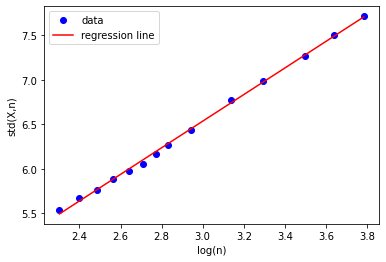

(1.4921912708677865, (array([2.30258509, 2.39789527, 2.48490665, 2.56494936, 2.63905733,
       2.7080502 , 2.77258872, 2.83321334, 2.94443898, 3.13549422,
       3.29583687, 3.49650756, 3.63758616, 3.78418963]), array([5.53821813, 5.66805774, 5.76595089, 5.88950324, 5.97719013,
       6.05114871, 6.16209669, 6.26275504, 6.4372776 , 6.77405333,
       6.98496794, 7.26983738, 7.49816094, 7.71248133]), array([1.49219127, 2.05827763])))


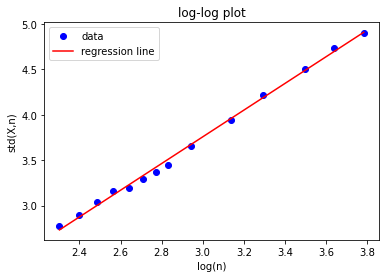

(1.4695364061129974, (array([2.30258509, 2.39789527, 2.48490665, 2.56494936, 2.63905733,
       2.7080502 , 2.77258872, 2.83321334, 2.94443898, 3.13549422,
       3.29583687, 3.49650756, 3.63758616, 3.78418963]), array([2.76948008, 2.89418548, 3.03954365, 3.1584522 , 3.197405  ,
       3.28799995, 3.3673409 , 3.447259  , 3.65088377, 3.9453211 ,
       4.21821279, 4.50240818, 4.73260986, 4.89989221]), array([ 1.46953641, -0.65257356])))


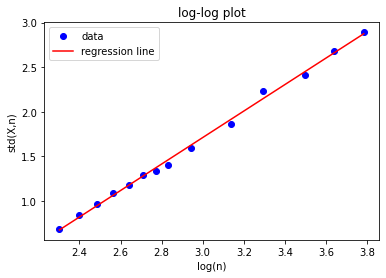

(1.4872428981483918, (array([2.30258509, 2.39789527, 2.48490665, 2.56494936, 2.63905733,
       2.7080502 , 2.77258872, 2.83321334, 2.94443898, 3.13549422,
       3.29583687, 3.49650756, 3.63758616, 3.78418963]), array([0.68544074, 0.8349428 , 0.96004488, 1.08741675, 1.17359214,
       1.29136823, 1.33751375, 1.40339396, 1.58797795, 1.86207664,
       2.22783177, 2.40653897, 2.6864781 , 2.89201118]), array([ 1.4872429 , -2.75259389])))


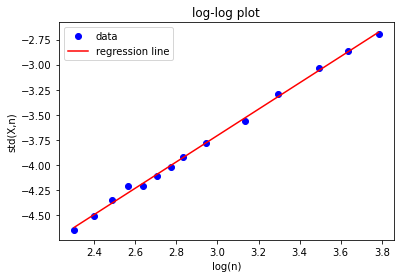

(1.3135881109178709, (array([2.30258509, 2.39789527, 2.48490665, 2.56494936, 2.63905733,
       2.7080502 , 2.77258872, 2.83321334, 2.94443898, 3.13549422,
       3.29583687, 3.49650756, 3.63758616, 3.78418963]), array([-4.64848503, -4.50637348, -4.34529737, -4.21460635, -4.21231094,
       -4.10866801, -4.02248474, -3.92403825, -3.78572154, -3.56626083,
       -3.29426571, -3.0296889 , -2.86584217, -2.69266246]), array([ 1.31358811, -7.64787649])))


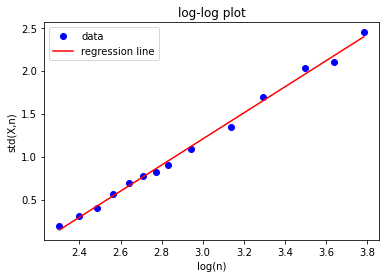

(1.516847681578815, (array([2.30258509, 2.39789527, 2.48490665, 2.56494936, 2.63905733,
       2.7080502 , 2.77258872, 2.83321334, 2.94443898, 3.13549422,
       3.29583687, 3.49650756, 3.63758616, 3.78418963]), array([0.19139271, 0.30801782, 0.4000642 , 0.55904163, 0.6948717 ,
       0.77164182, 0.81494356, 0.90378377, 1.08379522, 1.34649515,
       1.69582599, 2.02588611, 2.09792101, 2.44678939]), array([ 1.51684768, -3.34615632])))


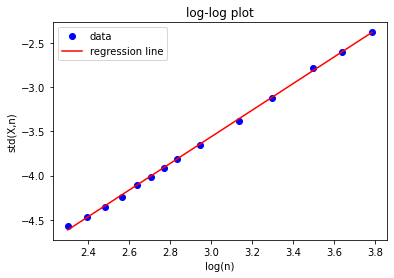

(1.510209439949599, (array([2.30258509, 2.39789527, 2.48490665, 2.56494936, 2.63905733,
       2.7080502 , 2.77258872, 2.83321334, 2.94443898, 3.13549422,
       3.29583687, 3.49650756, 3.63758616, 3.78418963]), array([-4.57433436, -4.46914542, -4.35322297, -4.23904057, -4.10386777,
       -4.01765005, -3.91113599, -3.81120582, -3.65009759, -3.38594865,
       -3.11821822, -2.77979308, -2.59887694, -2.37871672]), array([ 1.51020944, -8.09326876])))


' systems that have long range memory so strong positive autocorrelation over time, have 0.5<H<1 '

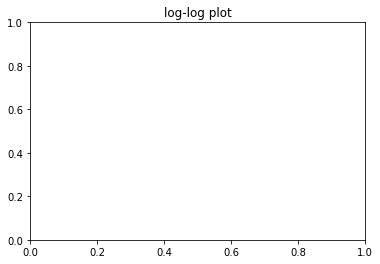

In [ ]:
# Detrended Fluctuation Analysis - (Peng et al., 1994)


for coin, name in zip(coins, coin_name):
    alpha, dfa = nolds.dfa(coin, nvals=[10, 11, 12, 13, 14, 15, 16, 17, 19, 23, 27, 33, 38, 44], overlap=True,
                           order=3, fit_trend='poly', debug_data=True, debug_plot=True), plt.title("log-log plot")
    print(alpha)
    # if alpha > 1:
    #     H = alpha - 1
    #     print(name + ":", np.round(H, 4))
    # elif alpha < 1:
    #     H = alpha
    #     print(name + ":", np.round(H, 4))
    

''' systems that have long range memory so strong positive autocorrelation over time, have 0.5<H<1 '''


In [ ]:
#mfDFA (Kantelhardt et al., 2001).
from MFDFA import MFDFA

def computeNplotMFDFA(data, coin_name):
    np.random.seed(3)
    # Select a band of lags, which usually ranges from very small segments of data, to very long ones, as
    lag = np.unique(np.logspace(0.25, 2.5, 100).astype(int))
    # Notice these must be ints, since these will segment the data into  chucks of lag size

    # Select the power q
    q_list = np.linspace(3, 15, 5)
    q_list = q_list[q_list!=0.0]
    # q_list = 2

    # The order of the polynomial fitting
    order = 4

    # Obtain the (MF)DFA as
    lag, dfa = MFDFA(data.values, lag=lag, q=q_list, order=order)

    # To uncover the Hurst index, lets get some log-log plots
    # And now we need to fit the line to find the slope. We will fit the first points, since the results are more accurate there.
    # Don't forget that if you are seeing in log-log scales, you need to fit the logs of the results

    slope = np.polyfit(np.log(lag), np.log(dfa), 1)[0]
    plt.figure(figsize = (5,5)),
    plt.title("Fractal dimensions of " + coin_name), 
    plt.ylabel("Fluctuation function \n Fq(s)"), plt.xlabel("Time interval (log)"),
    plt.loglog(lag, dfa, markersize = 4, label = q_list, marker = "o"), plt.legend(), plt.axline((0, 0), (1,1), color = 'r', linewidth = 2, transform = plt.gca().transAxes)
    print("H exponents (alpha -1) are: {}".format(slope-1)) 



H exponents (alpha -1) are: [0.43461542 0.40558877 0.38374479 0.36849016 0.35756205]
H exponents (alpha -1) are: [0.43622909 0.35082879 0.30728104 0.28303258 0.26777261]
H exponents (alpha -1) are: [0.47789148 0.39713748 0.35735415 0.33472677 0.32028382]
H exponents (alpha -1) are: [0.45315463 0.38533813 0.34889979 0.32740221 0.31349553]
H exponents (alpha -1) are: [0.45417942 0.36395974 0.3227135  0.29977779 0.28532716]


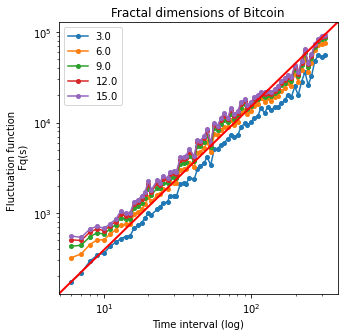

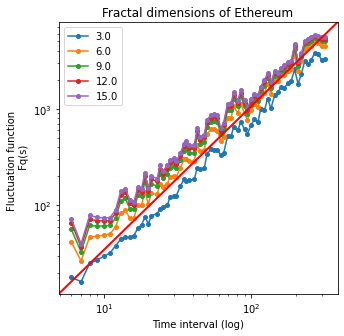

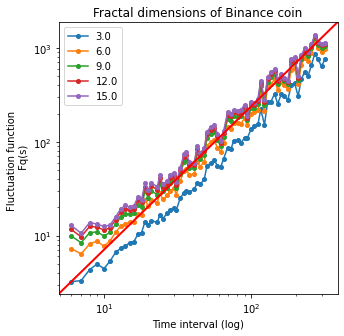

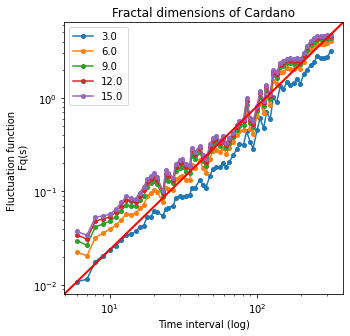

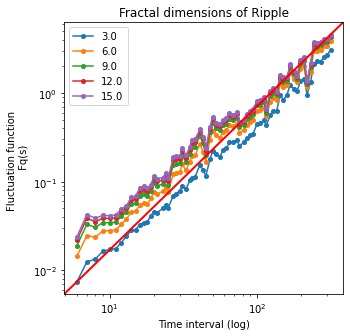

In [ ]:
# compute plot
for i, j in zip(coins, coin_name):
    if j == "Solana":
        continue
    else:
        computeNplotMFDFA(i, j)


In [7]:
# Support Vector Regression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

#Import other features
cardano_dataset = pd.read_csv("historical_data_cardano_new.csv", sep=",", header=0, index_col= 0)[:1400][::-1]
bitcoin_dataset = pd.read_csv("historical_data_bitcoin_new.csv", sep=",", header=0, index_col=0)[:1400][::-1]
ethereum_dataset = pd.read_csv("historical_data_ethereum_new (2).csv", sep=",", header=0, index_col=0)[:1400][::-1]
ripple_dataset = pd.read_csv("historical_data_xrp_new.csv", sep=",", header=0, index_col= 0)[:1400][::-1]

svr_datasets = [bitcoin_dataset, ethereum_dataset, cardano_dataset, ripple_dataset]
svr_coin_names = ['Bitcoin', "Ethereum", "Cardano", "Ripple"]


In [ ]:
for i,data in enumerate(svr_datasets):
    print("Missing values for {}: {}".format(svr_coin_names[i], data.isna().sum()))

Missing values for Bitcoin: Price (Close)                 0
Hash Rate                     0
Active Addresses Count        0
Average Transaction Fees      0
Transactions Count            8
Average Block Size (bytes)    0
dtype: int64
Missing values for Ethereum: Price (Close)                 0
Hash Rate                     0
Active Addresses Count        0
Average Transaction Fees      0
Transactions Count            8
Average Block Size (bytes)    0
dtype: int64
Missing values for Cardano: Price (Close)                 35
Active Addresses Count         0
Average Transaction Fees       0
Transactions Count             1
Block Count                    0
Block Size (bytes)             0
Average Block Size (bytes)     0
dtype: int64
Missing values for Ripple: Price (Close)                   0
Active Addresses Count          2
Average Transaction Fees        2
Transactions Count             10
Average Block Size (bytes)    127
dtype: int64


In [130]:
from pandas import DataFrame

def computeError(dataset, coin_name):
    
    dataset = dataset.fillna(0)
    X, y = dataset.iloc[:, 1:], dataset.iloc[:, 0]


    #split the data into train/test
    X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=False)

    X_scaler = StandardScaler()
    X_train_scaled = X_scaler.fit_transform(X=X_train_unscaled, y=y_train_unscaled)
    X_test_scaled = X_scaler.transform(X_test_unscaled)

    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(X = np.array(y_train_unscaled)[:, None])

    svr_grid_pipeline = GridSearchCV(
        SVR(),
        param_grid={'kernel': ['rbf', 'poly'],
                    'degree': [1,2,3,4],
                    'C': [1, 2, 3, 4],
                    'tol': [1e-1, 1e-3, 1e-4, 1e-6],
                    'gamma': ['auto', 'scale']},
        n_jobs=-2, verbose=0, scoring='neg_mean_squared_error'
    )

    #Fit the model on training data
    svr_grid_pipeline.fit(X_train_scaled, y_train_scaled[:, -1])

    #show the best parameters
    # print('Test Accuracy: {:.3f}'.format(svr_grid_pipeline.best_score_))
    print('Best Parameters: {}'.format(svr_grid_pipeline.best_params_))

    #Get R2 on training data
    r_squared = svr_grid_pipeline.score(X_train_scaled, y_train_scaled)
    print("The coefficient of determination is {}".format(r_squared))


    #make predictions on test set
    y_pred = svr_grid_pipeline.predict(X_test_scaled)
    y_pred = y_scaler.inverse_transform(y_pred)

    #calcultae the RMSE
    RMSE = mean_squared_error(y_test_unscaled, y_pred, squared=False)
    print("The root mean squared error for {} is {}".format(coin_name, RMSE))
    plt.figure(figsize=(5, 5))

    plt.title("Predicted values against actual values for " + coin_name),
    plt.xlabel("Time (in days)"), plt.ylabel("Price in US dollars"),
    plt.plot(y_test_unscaled, label="Actual values"), plt.plot(
        y_pred, label="Predicted values"),
    plt.legend()
    


Best Parameters: {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.1}
The coefficient of determination is -0.10966233079209853
The root mean squared error for bitcoin is 30396.702883790877


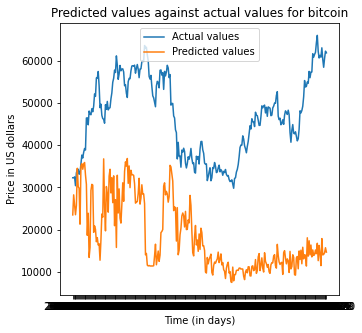

In [131]:
computeError(bitcoin_dataset, "bitcoin")


The coefficient of determination is -0.10966233079209853
The root mean squared error for Bitcoin is 30396.702883790877
The coefficient of determination is -0.05914958986852515
The root mean squared error for Ethereum is 2188.9781264134394
The coefficient of determination is -0.13456174562549347
The root mean squared error for Cardano is 10.437869254168456
The coefficient of determination is -0.15494413926245013
The root mean squared error for Ripple is 0.5189227253528425


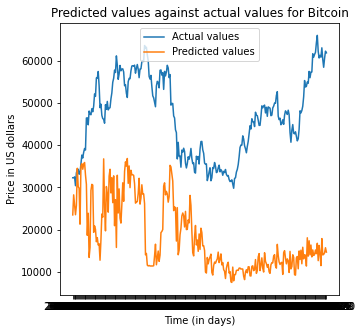

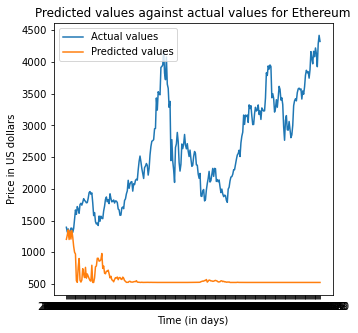

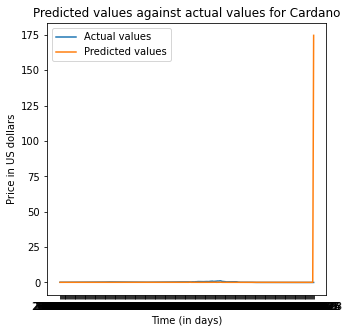

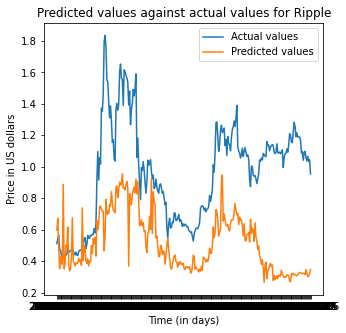

In [114]:
for i, coin in enumerate(svr_datasets):
    computeError(coin, svr_coin_names[i])

In [104]:


bitcoin_dataset = bitcoin_dataset.fillna(0)
print(bitcoin_dataset.isna().sum())

X, y = bitcoin_dataset.iloc[:, 1:], bitcoin_dataset.iloc[:, 0]


#split the data into train/test
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False)

X_scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X = X_train_unscaled, y = y_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(np.array(y_train_unscaled)[:, None])


print(X_train_scaled[:5])
print(y_train_scaled[:5])


Price (Close)                 0
Hash Rate                     0
Active Addresses Count        0
Average Transaction Fees      0
Transactions Count            0
Average Block Size (bytes)    0
dtype: int64
[[-1.5323825   1.38012586  5.34154363  0.10110064 -0.09156713]
 [-1.53881544  1.18171091  5.51554011 -0.76633263 -0.06362489]
 [-1.50098567  2.16118045  5.81547611  0.95696522 -0.07128761]
 [-1.53506456  2.09314588  5.92125845  1.85675708  0.04588236]
 [-1.50828829  2.80247715  5.73914094  2.32659848  0.05205257]]
[[0.89278759]
 [0.80667219]
 [1.05972723]
 [1.12521731]
 [1.14016599]]


In [109]:
import time
import sklearn
from sklearn.pipeline import make_pipeline



svr_grid_pipeline = make_pipeline(GridSearchCV(
    SVR(),
    param_grid={'kernel': ['rbf', 'poly'],
                'C': [1, 2, 3, 4],
                'degree': [2,3,4],
                'tol': [1e-1, 1e-3, 1e-4, 1e-6],
                'gamma': ['auto', 'scale']},
    n_jobs=-2, verbose=0, scoring='neg_mean_squared_error')
)

#Fit the model on training data
svr_grid_pipeline.fit(X_train_scaled, y_train_scaled[:, -1])

#Get R2 on training data
r_squared = svr_grid_pipeline.score(X_train_scaled, y_train_scaled)
print("The coefficient of determination is {}".format(r_squared))

#make predictions on test set
y_pred = svr_grid_pipeline.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred)

#calcultae the RMSE
RMSE = mean_squared_error(y_test_unscaled, y_pred, squared=False)
print("The root mean squared error for {} is {}".format("Bitcoin", RMSE))
plt.figure(figsize=(5, 5))

plt.title("Predicted values against actual values for " + coin_name),
plt.xlabel("Time (in days)"), plt.ylabel("Price in US dollars"),
plt.plot(y_test_unscaled, label="Actual values"), plt.plot(
    y_pred, label="Predicted values"),
plt.legend()



The coefficient of determination is -0.10966233079209853
The root mean squared error for Bitcoin is 30396.702883790877


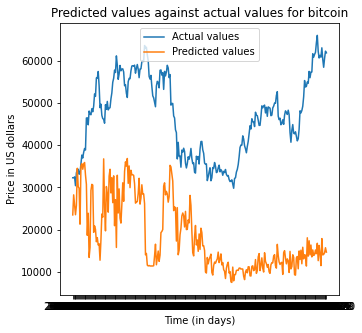

In [110]:
plt.figure(figsize=(5, 5))
plt.title("Predicted values against actual values for " + "bitcoin"),
plt.xlabel("Time (in days)"), plt.ylabel("Price in US dollars"),
plt.plot(y_test_unscaled, label="Actual values"), plt.plot(
    y_pred, label="Predicted values"),
plt.legend()


The root mean squared error for Bitcoin is 6278.272241814731
